In [377]:
# Librerías necesarias para nuestro análisis:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly_express as px
import plotly.graph_objects as go
import os

# Para que no nos aparezcan ciertos mensajes de error
import warnings


In [296]:
import os
print(os.getcwd())

c:\Users\campo\OneDrive\Desktop\data\contenidos\modulo 2\modulo tres\proyecto final Alzheimer


ESTUDIO SOBRE EL ALZHEIMER Y SUS POSIBLES FACTORES DE RIESGO PARA SU POSIBLE DIAGNOSTICO

El Alzheimer es la forma más común de demencia, un término general que se aplica a la pérdida de memoria y otras habilidades cognitivas que interfieren con la vida cotidiana. La enfermedad de Alzheimer es responsable de entre un 60 y un 80 por ciento de los casos de demencia. El Alzheimer no es una característica normal del envejecimiento. El factor de riesgo conocido más importante es el aumento de la edad, y la mayoría de las personas con Alzheimer son mayores de 65 años. Pero el Alzheimer no es solo una enfermedad de la vejez. 

A medida que la enfermedad de Alzheimer progresa, las personas tienen una mayor pérdida de memoria y otras dificultades cognitivas

En el caso de un diagnóstico de la enfermedad de Alzheimer, comenzar el tratamiento en las primeras etapas del proceso de la enfermedad puede ayudar a preservar el funcionamiento diario durante cierto tiempo. Un diagnóstico temprano también ayuda a las familias a planificar para el futuro.

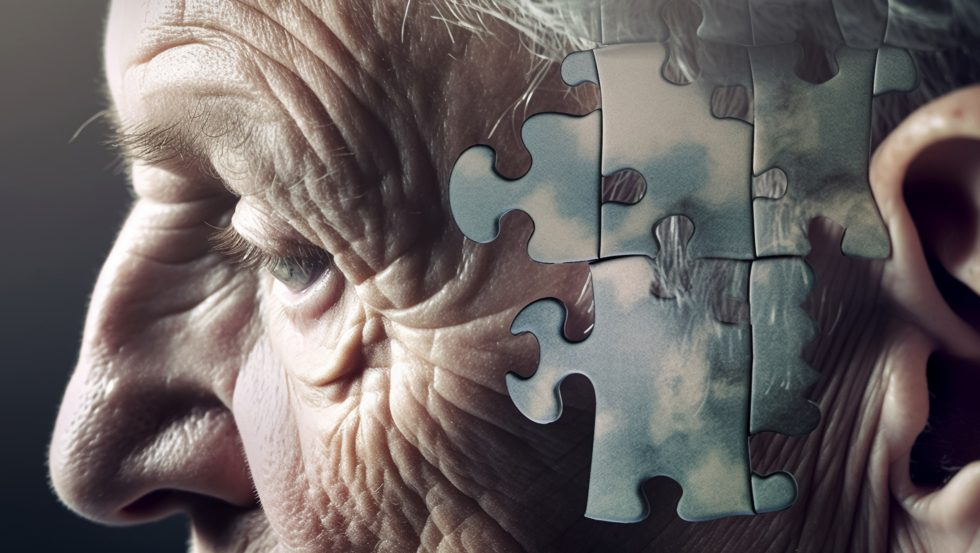

DATASET: oasis_longitudinal.csv: Estos datos constan de más de 373 muestras correspondientes a exploraciones MRI de 150 personas de entre 60 y 98 años. "Longitudinal" se refiere al hecho de que los datos fueron recopilados durante varias revisiones de los sujetos en diferentes momentos.

SOURCE:  Open Access Series of Imaging Studies (OASIS) 

PROPÓSITO DEL ANÁLISIS: Según una serie de condiciones o parámetros, podemos predecir si una persona es diagnosticada o no con la enfermedad de Alzheimer y realizamos un análisis donde vemos qué relaciones y conclusiones podemos deducir de estos indicadores.

In [297]:
# Cargar el dataset y mostrarlo:
import os
import pandas as pd

base_dir = 'C:/Users/campo/OneDrive/Desktop/data/contenidos/modulo 2/modulo tres/proyecto final Alzheimer/'
df = pd.read_csv(os.path.join(base_dir, 'oasis_longitudinal.csv'))

df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.00,27.00,0.00,1987,0.70,0.88
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.00,30.00,0.00,2004,0.68,0.88
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.00,0.50,1678,0.74,1.05
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.00,0.50,1738,0.71,1.01
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.00,0.50,1698,0.70,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.00,28.00,0.50,1693,0.69,1.04
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.00,26.00,0.50,1688,0.68,1.04
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.00,30.00,0.00,1319,0.80,1.33
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.00,30.00,0.00,1327,0.80,1.32


SIGNIFICADO DE LAS COLUMNAS:

DATOS DEMOGRAFICOS                                                                                                                                                                                                                      
Genero --> Contiene el sexo biologico del sujeto (Femenino/Masculino)                                                                                                                                                                               
Edad --> Contiene la edad en años del sujeto.                                                                                                                                                                                           
EDUC --> Almacena el grado de instrucción. Clasificado entre las categorías: 1: secundaria incompleta, 2: secundaria completa, 3: universidad incompleta, 4: universidad completa ,5: post-bachiller                                    
SES --> Contiene el nivel socioeconomico del sujeto. Clasificado entre las categorías de 1 (más alto status) to 5 ( más bajo status)

INFORMACION CLINICA:                                                                                                                                                                                                                    
MMSE --> Almacena el puntaje en el test MMSE, que mide la funcion cognitiva. Rangos de 0 (Peor) a 30 (Mejor), puntajes menores a 24 sugiere función anormal.                                                                            
CDR --> Contiene el puntaje en el test CDR, que evalúa el grado de deterioro cognitivo. 0 : Sin demencia, 0.5 : Demencia muy leve, 1 : Demencia leve, 2 : Demencia moderada y 3 : muy avanzada.                                                       
eTIV --> Volumen intracraneal total estimado en mm3                                                                                                                                                                                     
nWBV --> Volumen total del cerebro normalizado en tóxeles.

(MMSE)                                                                   
El Mini Examen del Estado Mental (MMSE) es un cuestionario de 30 puntos que se utiliza ampliamente en entornos clínicos y de investigación para medir el deterioro cognitivo. Se utiliza comúnmente en medicina y afines a la salud para detectar demencia. También se utiliza para estimar la gravedad y la progresión del deterioro cognitivo y para seguir el curso de los cambios cognitivos en un individuo a lo largo del tiempo; lo que lo convierte en una forma eficaz de documentar la respuesta de un individuo al tratamiento. El propósito del MMSE no ha sido, por sí solo, proporcionar un diagnóstico para ninguna entidad nosológica en particular.
Interpretaciones
Cualquier puntuación mayor o igual a 24 puntos (sobre 30) indica una cognición normal. Por debajo de esto, las puntuaciones pueden indicar un deterioro cognitivo grave (≤9 puntos), moderado (10 a 18 puntos) o leve (19 a 23 puntos). Es posible que también sea necesario corregir la puntuación bruta según el nivel educativo y la edad. Es decir, una puntuación máxima de 30 puntos nunca puede descartar la demencia. Las puntuaciones bajas a muy bajas se correlacionan estrechamente con la presencia de demencia, aunque otros trastornos mentales también pueden provocar resultados anormales en las pruebas MMSE.

Clasificación clínica de demencia (CDR)                                                                                     
La CDR™ en un aspecto es una escala de 5 puntos utilizada para caracterizar seis dominios de desempeño cognitivo y funcional aplicables a la enfermedad de Alzheimer y demencias relacionadas: memoria, orientación, juicio y resolución de problemas, asuntos comunitarios, hogar y pasatiempos y cuidado personal. La información necesaria para realizar cada calificación se obtiene a través de una entrevista semiestructurada del paciente y un informante confiable o fuente colateral (por ejemplo, un miembro de la familia) denominado Protocolo de Evaluación CDR™.
La tabla de puntuación CDR™ proporciona anclajes descriptivos que guían al médico a realizar calificaciones adecuadas basadas en los datos de la entrevista y el juicio clínico. 

Volumen intracraneal total estimado (eTIV)                                                                                                                    
La medida ICV, a veces denominada volumen intracraneal total (TIV), se refiere al volumen estimado de la cavidad craneal según lo delineado por la duramadre supratentorial o el contorno cerebral cuando la duramadre no es claramente detectable. La ICV se utiliza a menudo en estudios relacionados con el análisis de la estructura cerebral bajo diferentes modalidades de imagen, como resonancia magnética (RM), resonancia magnética y tensor de difusión (DTI), resonancia magnética y tomografía computarizada por emisión de fotón único (SPECT), ultrasonido y tomografía computarizada por emisión de fotón único. Tomografía (TC). La consistencia de ICV durante el envejecimiento lo convierte en una herramienta confiable para corregir la variación del tamaño de la cabeza entre sujetos en estudios que se basan en características morfológicas del cerebro. 

In [298]:
# Comprobar si hay columnas con valores faltantes
missing_values_in_columns = df.isnull().sum()
print(missing_values_in_columns)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [299]:
# Lista de columnas con valores faltantes
columns =  ['SES', 'MMSE']

# Rellenar valores faltantes con la media porque son datos numéricos
for column in columns:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [300]:
# Eliminar columnas 'Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'ASF' ya que no aportan información relevante para nuestro estudio. 
df.drop(columns=['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'ASF'], inplace=True)

In [301]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,M,87,14,2.00,27.00,0.00,1987,0.70
1,Nondemented,M,88,14,2.00,30.00,0.00,2004,0.68
2,Demented,M,75,12,2.46,23.00,0.50,1678,0.74
3,Demented,M,76,12,2.46,28.00,0.50,1738,0.71
4,Demented,M,80,12,2.46,22.00,0.50,1698,0.70


In [302]:
# Cambiamos el nombre de la columna M/F a 'Gender' para que sea más reconocible.
df.rename(columns={'M/F': 'Gender'}, inplace=True)

In [303]:
# Pasar datos de la columna ´SES´y ´MMSE´ a número entero
df['SES'] = df['SES'].astype(int)
df['MMSE'] = df['MMSE'].astype(int)

In [304]:
# Dividir la columna 'EDUC' en grupos según etapas educativas
mapping = {}
for i in range(6, 24):
    if 6 <= i <= 8:
        mapping[i] = '1'
    elif 9 <= i <= 11:
        mapping[i] = '2'
    elif 12 <= i <= 14:
        mapping[i] = '3'
    elif 15 <= i <= 17:
        mapping[i] = '4'
    elif 18 <= i <= 23:
        mapping[i] = '5'

# Replace the values in the educ column with the groups
df['EDUC'] = df['EDUC'].replace(mapping)

In [305]:
# Cambiar columna 'Gender' a datos binarios:
def funcion1(fila):
    if fila['Gender'] == 'F':
        return 1
    elif fila['Gender'] == 'M':
        return 0
    else:
        return np.nan  

df['Gender'] = df.apply(funcion1, axis=1)

In [306]:
df

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,0,87,3,2,27,0.00,1987,0.70
1,Nondemented,0,88,3,2,30,0.00,2004,0.68
2,Demented,0,75,3,2,23,0.50,1678,0.74
3,Demented,0,76,3,2,28,0.50,1738,0.71
4,Demented,0,80,3,2,22,0.50,1698,0.70
...,...,...,...,...,...,...,...,...,...
368,Demented,0,82,4,1,28,0.50,1693,0.69
369,Demented,0,86,4,1,26,0.50,1688,0.68
370,Nondemented,1,61,3,2,30,0.00,1319,0.80
371,Nondemented,1,63,3,2,30,0.00,1327,0.80


In [307]:
# Creamos una copia del dataset original sin modificar por otro ya modificado para comenzar con nuestro ánalisis:
df_original = df.copy()

In [308]:
df_original

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,0,87,3,2,27,0.00,1987,0.70
1,Nondemented,0,88,3,2,30,0.00,2004,0.68
2,Demented,0,75,3,2,23,0.50,1678,0.74
3,Demented,0,76,3,2,28,0.50,1738,0.71
4,Demented,0,80,3,2,22,0.50,1698,0.70
...,...,...,...,...,...,...,...,...,...
368,Demented,0,82,4,1,28,0.50,1693,0.69
369,Demented,0,86,4,1,26,0.50,1688,0.68
370,Nondemented,1,61,3,2,30,0.00,1319,0.80
371,Nondemented,1,63,3,2,30,0.00,1327,0.80


ANÁLISIS EXPLORATORIO (EDA)

In [375]:
df_original. describe()

,Gender,Age,SES,MMSE,CDR,eTIV,nWBV,Group
count,373.00,373.00,373.00,373.00,373.00,373.00,373.00,373.00
mean,0.57,0.96,2.44,0.85,0.29,1488.13,0.73,0.59
std,0.50,0.20,1.11,0.36,0.37,176.14,0.04,0.66
min,0.00,0.00,1.00,0.00,0.00,1106.00,0.64,0.00
25%,0.00,1.00,2.00,1.00,0.00,1357.00,0.70,0.00
50%,1.00,1.00,2.00,1.00,0.00,1470.00,0.73,0.00
75%,1.00,1.00,3.00,1.00,0.50,1597.00,0.76,1.00
max,1.00,1.00,5.00,1.00,2.00,2004.00,0.84,2.00


Aquí observamos un resumen de las estadísticas clave del dataset en su conjunto. Como primera conclusión, se observa que todas las columnas cuentan con 373 filas, por lo que no hay falta de datos. El total de hombres sobre mujeres es un 57% mayor, siendo un poco superior en media, con lo que la desviación estandar es la mitad. La edad de los pacientes varía desde 61 hasta 88 años.El MMSE evalúa la función cognitiva, que tiene un promedio de aproximadamente 0.85. El CDR mide la gravedad de la demencia dónde tiene valores varían que desde 0 hasta 2. Tambíen es de analizar los percentiles, que nos ayudan a comprender como se agrupan los datos segmentados en porcentajes sobre el conjunto total restantes.                         

En resumen, este conjunto de datos proporciona información sobre características clínicas y medidas de volumen cerebral en pacientes con Alzheimer. El eTIV y el nWBV son especialmente relevantes para comprender la relación entre la atrofia cerebral y la progresión de la enfermedad.

In [309]:
df_grouped = df_original.groupby(['Gender', 'Group']).size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=df_grouped['Group'], values=df_grouped['counts'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Total de pacientes por diagnóstico",
    # Añadir anotaciones en el centro de el pie chart
    annotations=[dict(text='Group', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

El total de datos demuestra como en la mayoría de los 150 pacientes en las 373 muestras realiazadas para este estudio acaban teniendo un buen diágnostico, frente al cercano valor de personas si dementes.

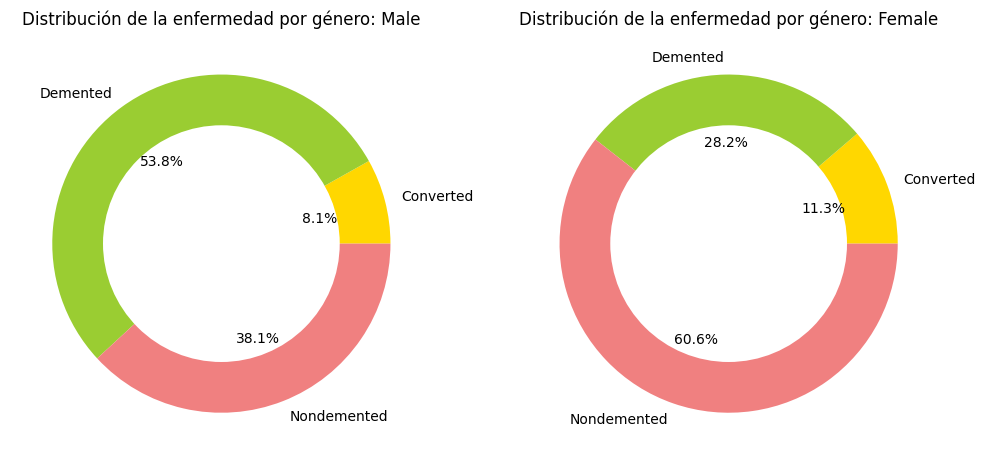

In [310]:
# 'Género' es una variable binaria donde 0 representa 'Hombre' y 1 representa 'Mujer'
df_grouped = df_original.groupby(['Gender', 'Group']).size().reset_index(name='counts')

# Pie chart 
fig, axs = plt.subplots(1, 2, figsize=(12,6))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

for i, gender in enumerate(df_grouped['Gender'].unique()):
    df_gender = df_grouped[df_grouped['Gender'] == gender]
    gender_label = 'Male' if gender == 0 else 'Female'  
    axs[i].pie(df_gender['counts'], labels = df_gender['Group'], autopct='%1.1f%%', colors=colors)
    axs[i].set_title(f'Distribución de la enfermedad por género: {gender_label}')  
    axs[i].add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.show()

En esta muestra cabe destacar como el género masculino supera en casi el doble el total de afectados por la demencia en comparación con las mujeres. Por otro lado, el grupo de converted (personas que en un principio dieron un resultado negativo pero luego demostraron tener demencia) muestra un porcentaje m'as similar y es pequeño en ambos géneros.

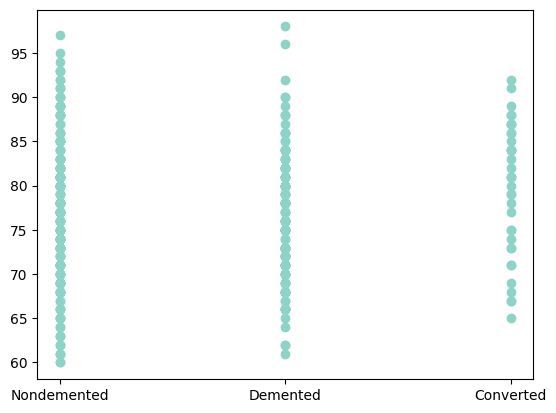

In [311]:
plt.scatter(df_original['Group'], df_original['Age'])
plt.show()

Este gráfico de dispersión compara la posible relación de la edad con la categoría de diagnóstico. Se observa que las personas no dementes están muy concentrados entre los 60 a 95 años y no muestran desajustes. Las personas dementes muestran que más variabilidad, concentrándose mñás en el extremo superior , segñun avanza la edad. Los convertidos tienen mayor dispersión, por lo que su estado puede demostrar muchos cambios significativos. El rango de 75 a 90 muestra una continuidad común en todos los grupos.

CONTINUAMOS CON NUESTRO ANÁLISIS EXPLORATORIO CREANDO UN DATASET CON DATOS COMPLETAMENTE BINARIOS O NUMÉRICOS PARA UN ESTUDIO MÁS FACIL DE INTERPRETAR Y PREDECIR MEJOR MODELOS DE MACHINE LEARNING

In [312]:
# Cambiamos columna de 'Group' a los tres estados de diagnóstico:
mapping = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}  # Define your mapping here
df_original['Group'] = df['Group'].replace(mapping)

In [313]:
# Dividir la edad en estado de Alzheimer precoz (menor de 60) y avanzado (mayor de 65):
def funcion2(fila):
    if fila['Age'] < 65:
        return 0
    elif fila['Age'] >= 65:
        return 1
    else:
        return np
    
df_original['Age'] = df_original.apply(funcion2, axis=1)

In [314]:
# Dividir el MMSE (que mide el nivel de funcion cognitiva) en  mayores de 24 (sugiere  función normal) de menores de ese valor (nivel cognictivo malo).
def divide_MMSE(fila):
    if fila['MMSE'] > 24:
        return 1  # sugiere función normal
    elif fila['MMSE'] <= 24:
        return 0  # nivel cognitivo malo
    else:
        return np.nan

df_original['MMSE'] = df_original.apply(divide_MMSE, axis=1)

In [315]:
# Colocar la columna 'Group' al principio
cols = list(df_original.columns)
cols.remove('Group')
cols.append('Group')
df_original = df_original[cols]

In [316]:
df_original

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Group
0,0,1,3,2,1,0.00,1987,0.70,0
1,0,1,3,2,1,0.00,2004,0.68,0
2,0,1,3,2,0,0.50,1678,0.74,1
3,0,1,3,2,1,0.50,1738,0.71,1
4,0,1,3,2,0,0.50,1698,0.70,1
...,...,...,...,...,...,...,...,...,...
368,0,1,4,1,1,0.50,1693,0.69,1
369,0,1,4,1,1,0.50,1688,0.68,1
370,1,0,3,2,1,0.00,1319,0.80,0
371,1,0,3,2,1,0.00,1327,0.80,0


In [318]:
# Crear un nuevo dataset con los cambios que será el definitivo para realizar las siguientes analiticas y el estudio de ML.
clean_data = df_original.copy()

clean_data.to_csv('clean_data.csv', index=False)


In [319]:
# Leo el dataset definitivo
df_clean = pd.read_csv('clean_data.csv')

df_clean


,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Group
0,0,1,3,2,1,0.00,1987,0.70,0
1,0,1,3,2,1,0.00,2004,0.68,0
2,0,1,3,2,0,0.50,1678,0.74,1
3,0,1,3,2,1,0.50,1738,0.71,1
4,0,1,3,2,0,0.50,1698,0.70,1
...,...,...,...,...,...,...,...,...,...
368,0,1,4,1,1,0.50,1693,0.69,1
369,0,1,4,1,1,0.50,1688,0.68,1
370,1,0,3,2,1,0.00,1319,0.80,0
371,1,0,3,2,1,0.00,1327,0.80,0


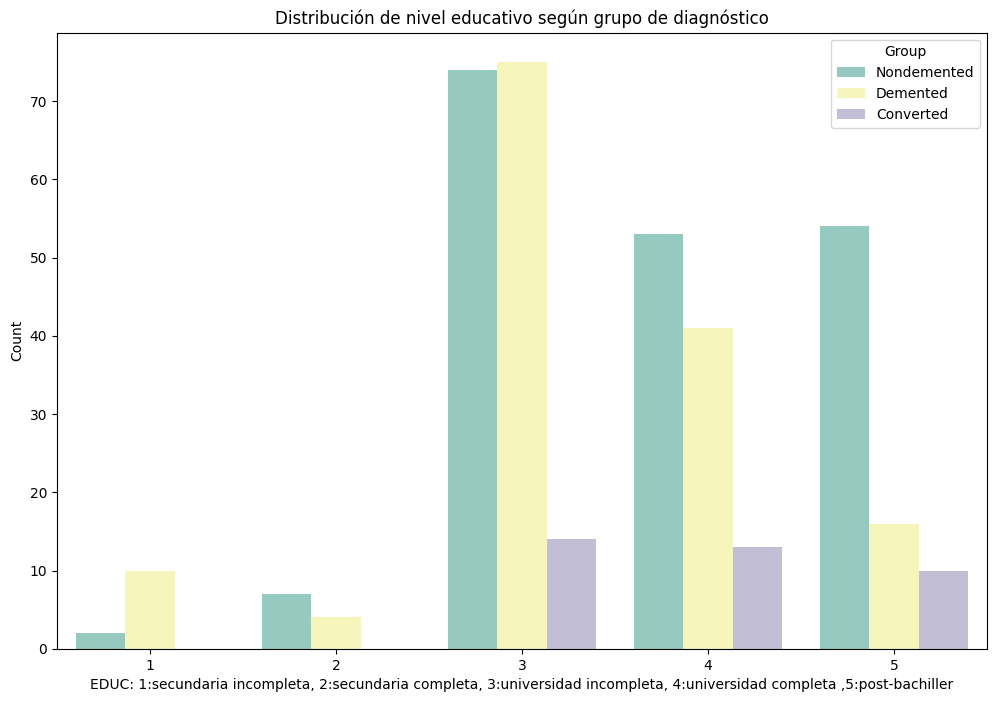

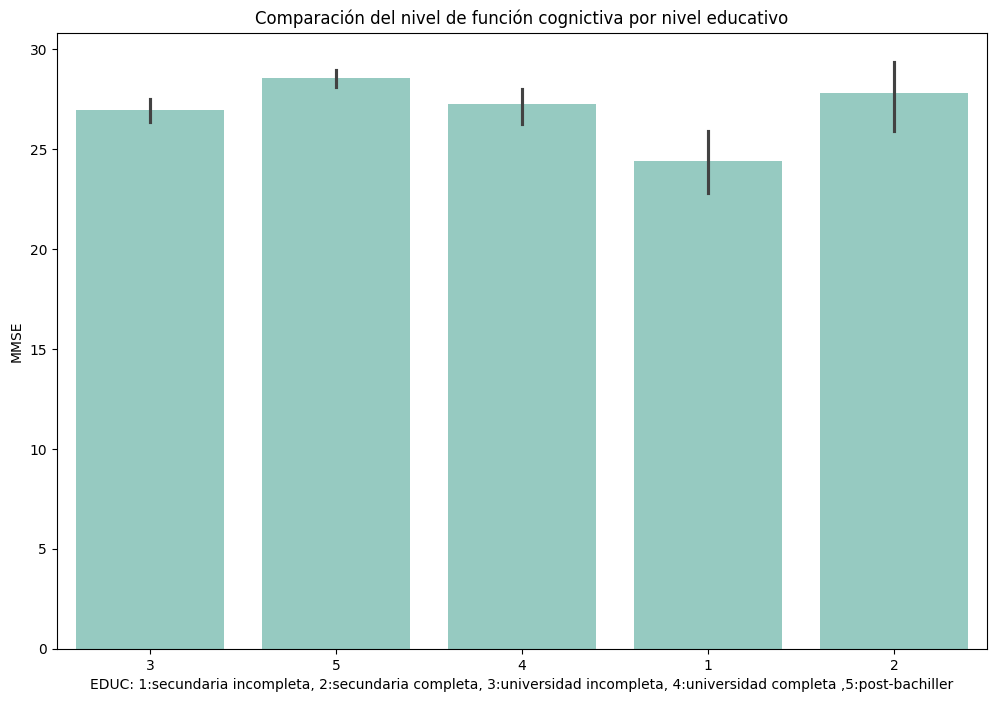

In [343]:

plt.figure(figsize=(12,8))
sns.countplot(x='EDUC', hue='Group', data=df, order=sorted(df['EDUC'].unique()))

plt.title('Distribución de nivel educativo según grupo de diagnóstico')
plt.xlabel('EDUC: 1:secundaria incompleta, 2:secundaria completa, 3:universidad incompleta, 4:universidad completa ,5:post-bachiller')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

# Segundo grafico
plt.figure(figsize=(12,8))
sns.barplot(x='EDUC', y='MMSE', data=df, errcolor=None)

plt.title('Comparación del nivel de función cognictiva por nivel educativo')
plt.xlabel('EDUC: 1:secundaria incompleta, 2:secundaria completa, 3:universidad incompleta, 4:universidad completa ,5:post-bachiller')
plt.ylabel('MMSE')
plt.show()

El grado educativo no es determinante para predecir un diagnóstico final de demencia, pero los estudios demuestran que a mayor nivel educativo(universidad o post-grado) la probabilidad de sufrir la enfemermedad es mucho menor. Estos datos también pueden influir en el desarrollo normal del cerebro en personas jóvenes, la etapa de vida más habitual dónde se realiza este nivel de estudios.

Según estudios, aunque el cerebro alcanza su mayor tamaño en la adolescencia temprana, los años de la adolescencia sirven para afinar su funcionamiento. El cerebro termina de desarrollarse y de madurar entre los 25 y los 30 años (de ahí que esos datos alcancen ese resultado).

La función cognictiva sigue una distribución de valores bastante favorable y normal, sólo sufriendo un ligero descenso en el grupo educativo 4, pero nunca por debajo del nivel cognictivo anormal de 24.

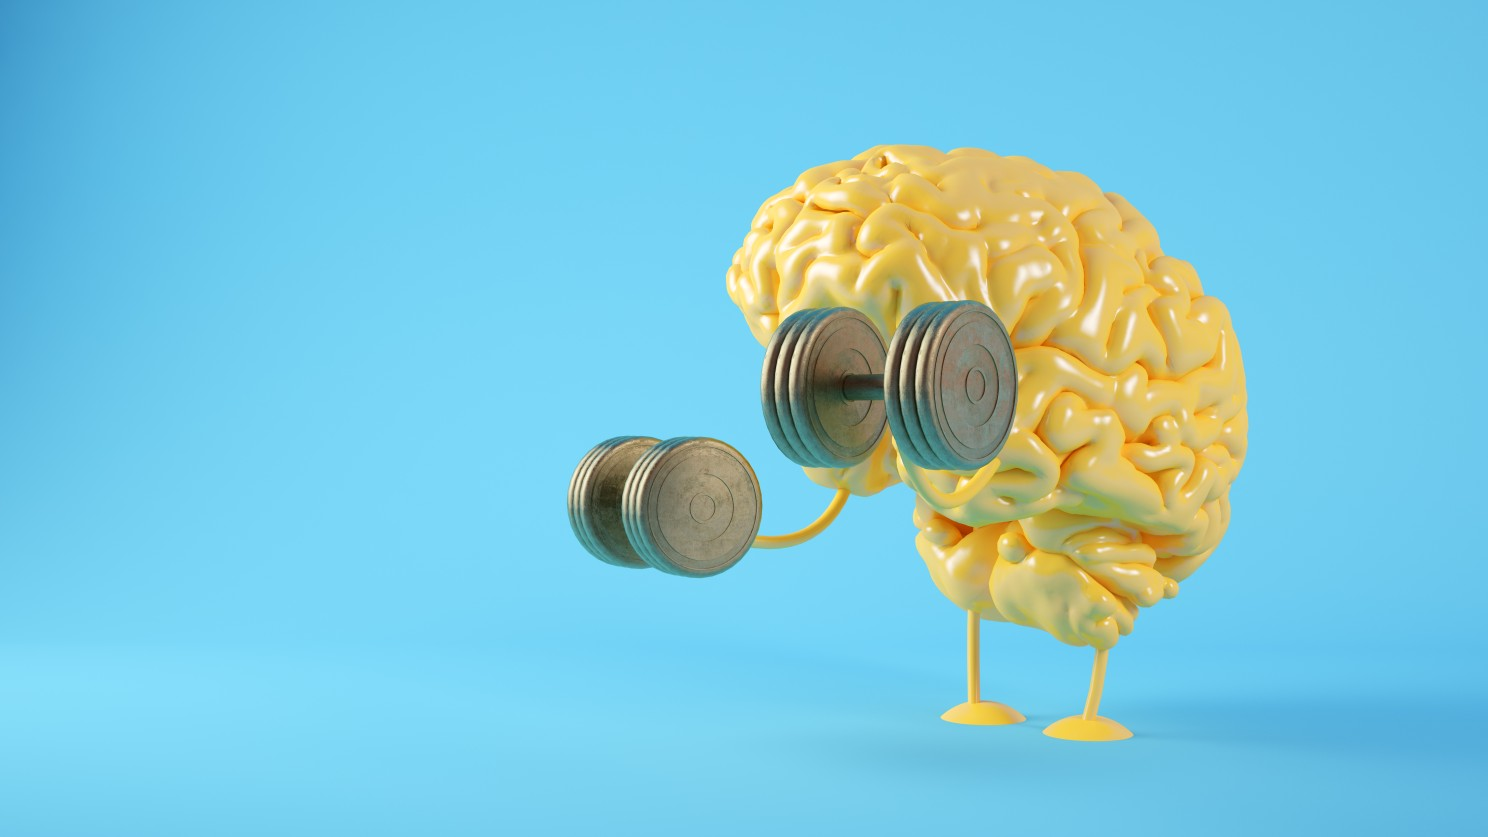

In [342]:
fig = px.box(df_original, x='Age', y='nWBV')

fig.update_layout(
    title='Comparación de nWBV (volumen total del cerebro normalizado) por edad',
    xaxis_title='Age',
    yaxis_title='nWBV'
)

fig.show()

Aquí se observa un indicador clave que puede resultat crucial en nuestro estudio, dónde se muestra cómo a medida que la edad avanza en un sujeto, el tamaño del cerebro disminuye considerablemente de volmen, habiendo un deterioro muy marcado a partir de los 70 años. El nWBV resulta un indicador valioso para está deducción.

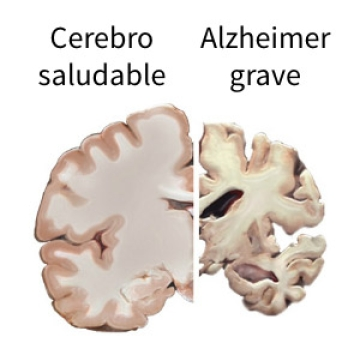

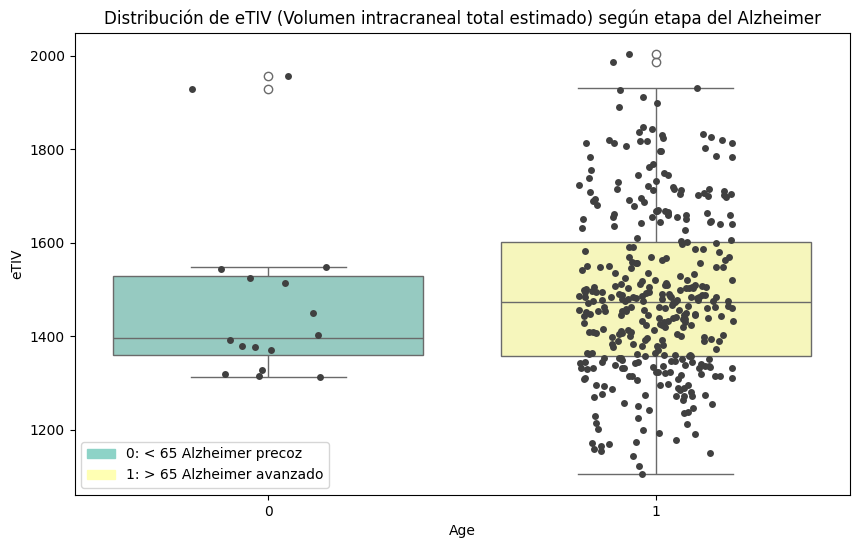

In [367]:


plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='eTIV', data=df_clean, hue='Age', palette="Set3", legend=False)
sns.stripplot(x='Age', y='eTIV', data=df_clean, color=".25", jitter=0.2)

# Crear leyenda a edad
precoz = mpatches.Patch(color=sns.color_palette("Set3")[0], label='0: < 65 Alzheimer precoz')
avanzado = mpatches.Patch(color=sns.color_palette("Set3")[1], label='1: > 65 Alzheimer avanzado')
plt.legend(handles=[precoz, avanzado])

plt.title('Distribución de eTIV (Volumen intracraneal total estimado) según etapa del Alzheimer')
plt.xlabel('Age')
plt.ylabel('eTIV')
plt.show()

 Analizamos el volumen intracraneal total estimado (eTIV) en dos grupos de pacientes con Alzheimer, diferenciados por la etapa de la enfermedad, dónde puede observarse que el grupo 1 con la enfermedad en estado avanzado, concentra una distribución intensa pero más dispersa. A medida que avanza la enfermedad de Alzheimer, se observa una disminución gradual en el eTIV.
Según estudios, esta disminución está relacionada con la atrofia cerebral, que en etapas tempranas, el eTIV puede estar relativamente preservado, pero a medida que progresa la enfermedad, se produce una atrofia significativa que afecta principalmente la corteza cerebral.                                 

Sin duda, este seguimiento del eTIV a lo largo del tiempo puede ayudar a los médicos a evaluar la progresión de la enfermedad y ajustar el manejo clínico.
 

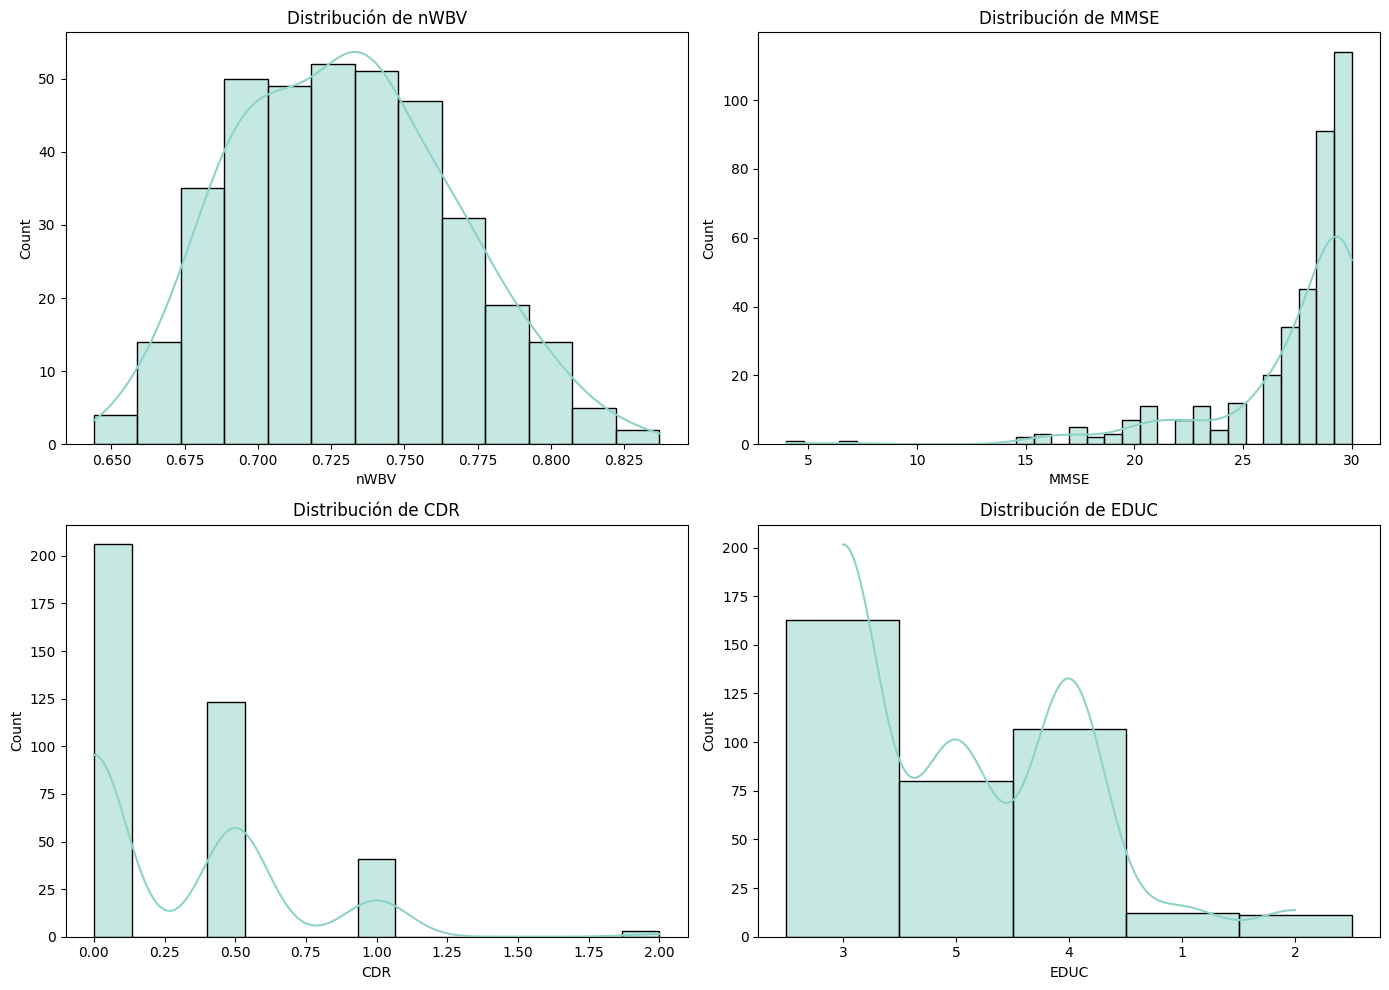

In [373]:

fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(ax=axes[0, 0], data=df, x='nWBV', kde=True)
axes[0, 0].set_title('Distribución de nWBV')

sns.histplot(ax=axes[0, 1], data=df, x='MMSE', kde=True)
axes[0, 1].set_title('Distribución de MMSE')

sns.histplot(ax=axes[1, 0], data=df, x='CDR', kde=True)
axes[1, 0].set_title('Distribución de CDR')

sns.histplot(ax=axes[1, 1], data=df, x='EDUC', kde=True)
axes[1, 1].set_title('Distribución de EDUC')

plt.tight_layout()
plt.show()

Distribución de algunas variables asociadas a los cuadros de Demencia:

Se observa que el volumen total del cerebro normalizado sigue una distribución aparentemente normal con una mediana de 0.74; en el test MMSE hay una proporción alta que puntúan por encima de 24 en el test; respecto al CDR, de los que presentan algún grado de demencia, se observan mayor frecuencia en demencia muy leve (0.5); y en cuanto al grado de educación, con mayor frecuencia los sujetos presentaron un nivel educativo de universidad incompleta (3).

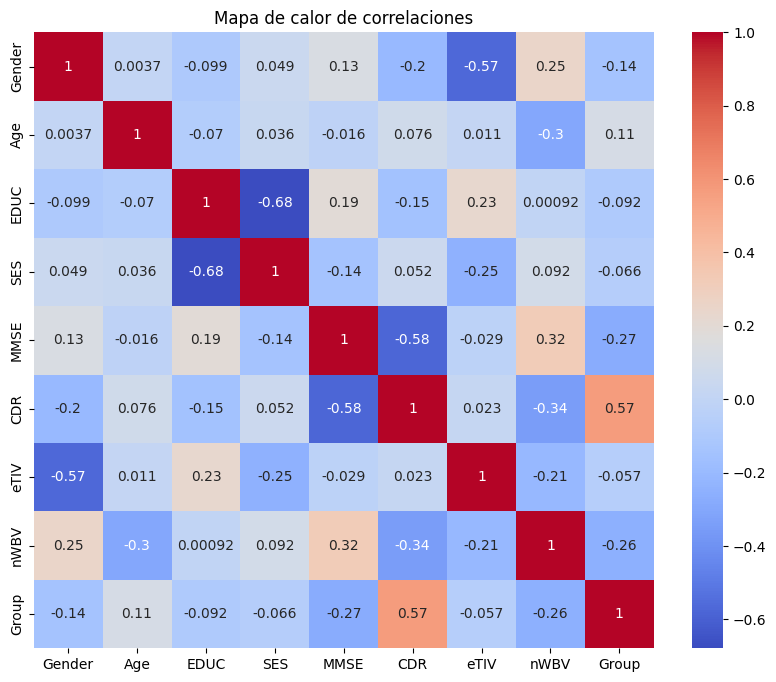

In [374]:
plt.figure(figsize=(10,8))
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm')

plt.title('Mapa de calor de correlaciones')
plt.show()

Con los valores de los 416 sujetos en el dataset, las correlaciones en este mapa de calor señalan que de las variables de interés aquellas que presentan una mayor correlación son tres: nWBV-MMSE, CDR-Group y nWBV-Gender, dónde toda la atención cae en CDR-Group (el único grupo con la correlación más fuerte y cercana a 1.) En general, casi todo el dataset muestra valores negativos o cercanos a cero, por lo que el dataset es poco correlativo y muy disperso entre sí. Esto indica que el Alzheimer puede ser influenciado por muchos factores distintos. 
Que sólo haya un único valor cercano a 1 (0.57), demuestra que el dataset es de calidad y de buena salud estadística para este tipo de estudio. 